In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv')
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [3]:
labels = ['Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Average Covered Charges','Average Medicare Payments',]
df2 = df.drop(columns=labels)
df2.columns

Index(['DRG Definition', 'Total Discharges', 'Average Total Payments'], dtype='object')

In [4]:
df2['Total Payments'] = df2['Total Discharges'] * df2['Average Total Payments']
df2.columns

Index(['DRG Definition', 'Total Discharges', 'Average Total Payments',
       'Total Payments'],
      dtype='object')

In [5]:
new_labels = ['Total Discharges', 'Average Total Payments',]
df3 = df2.drop(columns=new_labels)
df3.columns

Index(['DRG Definition', 'Total Payments'], dtype='object')

In [6]:
df4 = df3.groupby('DRG Definition').sum()
df4.sort_values(by='Total Payments', ascending=False)
df4.head()

,Total Payments
DRG Definition,
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,4.814397e+08
002 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W/O MCC,4.702237e+06
"003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",1.930364e+09
"004 - TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",6.652462e+08
005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT,1.160407e+08


In [7]:
df5 = df4[:101]
df5.shape

(101, 1)

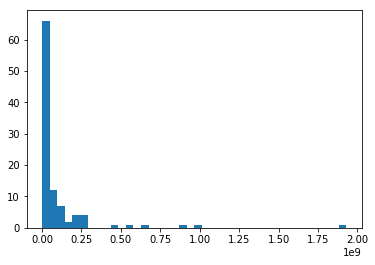

In [8]:
plt.hist(df5['Total Payments'], bins=40, )
plt.show()

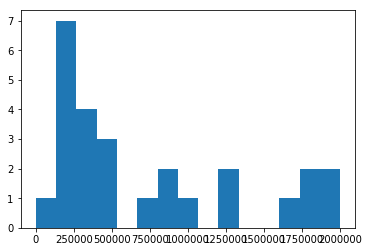

In [9]:
plt.hist(df5['Total Payments'], bins=15, range=(0,2000000))
plt.show()